# Inspecting TESS light curves for a project
---



In [ ]:
# Provide the name of the project and the tess cycle it was observed in: 1 or 2; 3 is not yet set up (probably)
# This project must be set up with TESS_Prep.ipynb, but it doesn't have to be a Cantat-Gaudin cluster catalog. 


project_name = 'Praesepe_tails'



**Import Python modules**
Python comes with only some basic functions pre-loaded. All other computer programs are included in "modules," which must be imported.

In [ ]:
# Plotting program
import matplotlib.pyplot as plt

# Plots are shown in the notebook
%matplotlib inline

# Searches for files
from glob import glob

# Good for reading/writing data tables
import pandas as pd
from astropy.table import Table

# Better math, numbers, and array functions
import numpy as np

# How long does something take?
import time

# I forget what this does.
import warnings
warnings.filterwarnings('ignore')

**Set up directories**

In [ ]:
# The main directory in Google Drive:
dir_drive = "/content/gdrive/Shareddrives/DouglasGroup/"
dir_main = dir_drive # i have a bad habit of using dir_main and dir_drive interchangeably so i'll define both here.

# The various clusters we will analyze are organized in the "Projects" folder according to the name of the cluster.
# The "project_name" is set at the top of this notebook
dir_project = dir_drive + "tess_check/" + project_name + "/"

**Authorize access to our Drive**

In [ ]:
# We need to give this notebook access to the data stored in our Google Drive.
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

# Google Colab has access to many of the Python modules we will need, and are available for import
# Others are not pre-installed, but are accessible online and can be downloaded and installed via pip (e.g., astroquery)
# However, our code is stored in our Drive. We have to tell the computer where it is located so that it will be available for import:
import sys
# First, we need to tell the system where it can locate the Python modules. This is done by adding the directories to the "path.""
# After that, we can import our modules just like we did previously for those already installed on the Google servers.

#### I have my own Python codes saved in folders located in /content/gdrive/My Drive/PythonCode/. I've modified this for Mark.
sys.path.append(dir_main)
# If/when you move these programs, you will need to edit myDir.py and then update its path name in the imports in tess_tools.py and tesscheck.py
from tess_check import myDir as myDir
#from tess_check import tess_tools as tess_tools
from tess_check import tesscheck as tesscheck

# Test to make sure myDir is working properly
dir_project_function = myDir.project_dir(project_name)
if dir_project_function != dir_project:
  print('There is a problem with the "myDir" program. It is loading the incorrect path for the project')

Mounted at /content/gdrive/


In [ ]:
# from importlib import reload
#reload(tesscheck)

**Check the status of this project**

Each project includes a status file (status.txt), which includes some basic information on what has been done already. 

In [ ]:
status_exist = glob(dir_project+'Status.txt')
if np.size(status_exist) == 0:
  tesscheck.make_status(project_name,reset=True)  
  exist = 0
  while exist == 0:
    status_exist = glob(dir_project+'Status.txt')
    if len(status_exist)>0:
      print("status.txt has been created")
      exist = 1
      status = tesscheck.read_status(project_name)
else:
  status = tesscheck.read_status(project_name)
status

# the first time this is run takes awhile becuase Drive is slow to recognize new files. 

{'Auto': 'Yes',
 'Project': 'Praesepe_tails',
 'Steps': 'Status_Initialized',
 'Users': 'Jason Team_Member Jessica'}

**Auto-inspect all TESS data** **SKIP**

Before a user inspects the TESS data, they must be analyzed automatically and indpendently by the computer. 

In [ ]:
# Check if it has been run...

# check if Status.txt exists
# read Status.txt
status = tesscheck.read_status(project_name)
if status['Auto'] == 'No':
  # if auto hasnt been run yet, then do it.
#  tesscheck_auto(project_name)
  tesscheck.tesscheck_auto(project_name, tess_cycle=1, redo=False)
  # update Status.txt
  tesscheck.make_status(project_name,change_auto='Yes')
else:
  print('Auto-inspect completed.')


Auto-inspect completed.


59


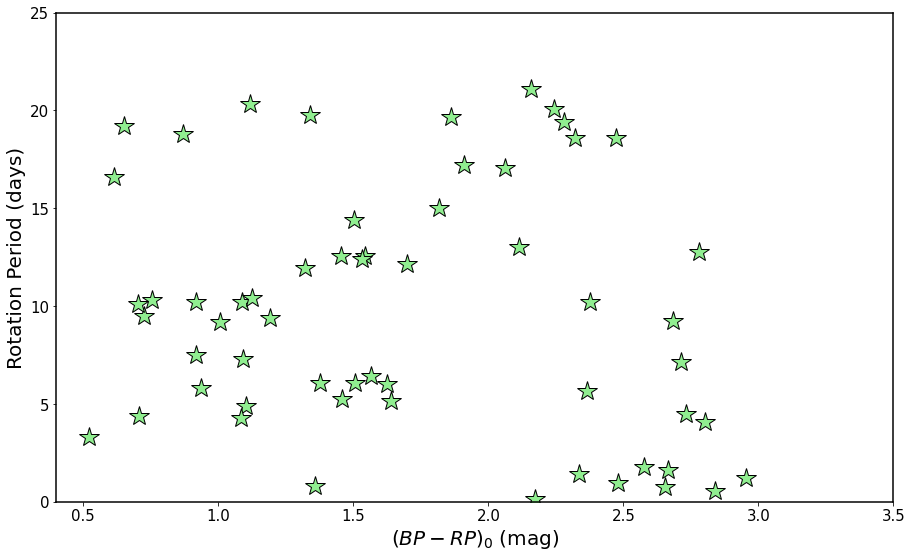

In [ ]:
 tesscheck.prot_auto_show(project_name, clusters=False, pcut=0.1, av=0)

**Identify the user**
The user must log in. If you are a new user (your name is not listed), select "other," then enter your name when prompted. This will add your profile to the results spreadsheet (ComaBer), and update the users listed in the status.txt file.

In [ ]:
# It takes ~4 seconds to verify an existing user, and ~10 seconds to add a new user.
user = tesscheck.tess_user(project_name)

Which user? Press...
   1 for Jason
   2 for Team_Member
   3 for Jessica
   4 for Other
3
Jessica is logged in.
This user has a sheet


**Load our project table (the Googele Sheet "ComaBer")**

This also determines how many stars you still have to analyze.

In [ ]:
target_table = tesscheck.get_prot_table('Auto',project_name)
target_data_val = target_table.get_all_values()
target_data = pd.DataFrame.from_records(target_data_val[1:],columns=target_data_val[0])
dr2_list = target_data['DR2Name'].to_numpy()
gbr = target_data['BP_RP'].to_numpy()

prot_table = tesscheck.get_prot_table(user,project_name)
prot_data_val = prot_table.get_all_values()
prot_data = pd.DataFrame.from_records(prot_data_val[1:],columns=prot_data_val[0])

star_list = tesscheck.stars_todo(prot_data)
#star_list = stars_todo_split(prot_data,user)
number_stars = len(star_list)
print(str(number_stars)+' stars to analyze')


0 stars to analyze


**Set up interface (widgets)**

In [ ]:
# set up the widgets
axis_fontsize = 16
import matplotlib.pylab as pylab
params = {'axes.labelsize': 16,'axes.titlesize': 16,'xtick.labelsize': 14,'ytick.labelsize': 14}
pylab.rcParams.update(params)

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from IPython.core.display import clear_output

'''
sector_widget = widgets.ToggleButtons(
#        options=['All','15', '16'],
        options=['All'],
        description='Sectors:',
        disabled=False,
        button_style=''
        )
'''

lc_widget = widgets.ToggleButtons(
        options=['CPM','SAP'],
        description='Light Curve:',
        disabled=False,
        button_style=''
        )

button_widget = widgets.ToggleButtons(
        options=['Under Review','Publish','Good','Follow up','Flat', 'Garbage'],
        description='Save/Reject:',
        disabled=False,
        button_style=''
        )

sector_widget = widgets.SelectMultiple(
    options=['ready','to','rumble'], 
    value=['ready','to','rumble'], 
    rows=3,
    description='Sectors',
    disabled=False
)

save_widget = widgets.ToggleButtons(
        options=['Continue'],
        description='Save',
        disabled=False,
        button_style=''
        )

yra_widget = widgets.Text(
    value='0.0',
    placeholder='0.0',
    description='Y-range:',
    disabled=False
)

xra_widget = widgets.Text(
    value='0',
    placeholder='0',
    description='X-range: xmin, xmax',
    disabled=False
)

pmin_widget = widgets.Text(
    value='0.09',
    placeholder='0.09',
    description='Min Period:',
    disabled=False
)

pmax_widget = widgets.Text(
    value='30.0',
    placeholder='30.0',
    description='Max Period:',
    disabled=False
)

notes_widget = widgets.Text(
    value='',
    placeholder='',
    description='Add note:',
    disabled=False
)

sap_widget = widgets.Checkbox(False, description='Fit line to SAP?')
xlog_widget = widgets.Checkbox(False, description='X-log?')
double_widget = widgets.Checkbox(False, description='Double the period?')
multi_widget = widgets.Checkbox(False, description='Multi-periodic?')
flare_widget = widgets.Checkbox(False, description='Are there flares?')

print('widgets loaded')

widgets loaded


In [ ]:
def meancolor(color):
  spts = ['F3V', 'F4V', 'F5V', 'F6V', 'F7V', 'F8V', 'F9V', 'F9.5V', 'G0V',
        'G1V', 'G2V', 'G3V', 'G4V', 'G5V', 'G6V', 'G7V', 'G8V', 'G9V',
        'K0V', 'K1V', 'K2V', 'K3V', 'K4V', 'K5V', 'K6V', 'K7V', 'K8V',
        'K9V', 'M0V', 'M0.5V', 'M1V', 'M1.5V', 'M2V', 'M2.5V', 'M3V',
        'M3.5V', 'M4V', 'M4.5V', 'M5V', 'M5.5V', 'M6V', 'M6.5V', 'M7V',
        'M7.5V', 'M8V', 'M8.5V', 'M9V', 'M9.5V']
  color_means = np.array([0.518, 0.546, 0.587, 0.64 , 0.67 , 0.694, 0.719, 0.767, 0.784,
        0.803, 0.823, 0.832, 0.841, 0.85 , 0.869, 0.88 , 0.9  , 0.95 ,
        0.983, 1.01 , 1.1  , 1.21 , 1.34 , 1.43 , 1.53 , 1.7  , 1.73 ,
        1.79 , 1.84 , 1.97 , 2.09 , 2.13 , 2.23 , 2.39 , 2.5  , 2.78 ,
        2.94 , 3.16 , 3.35 , 3.71 , 4.16 , 4.5  , 4.65 , 4.72 , 4.86 ,
        5.1  , 4.78 , 4.86 ])
  diferences = np.abs(color_means - color)
  spt = spts[np.argmin(diferences)]
  return(spt)

In [ ]:
#Do you want to look at specific objects?
specific = input('y to look at specific objects, n to continue your spreadsheet')
if specific == 'y':
  print('Please provide Gaia DR2 names, comma seperated with no spaces!')
  star_list = input('Which object(s)?=')
  star_list = star_list.split(',')
  number_stars = len(star_list)
  print(str(number_stars)+' stars to analyze')
else:
  target_table = tesscheck.get_prot_table('Auto',project_name)
  target_data_val = target_table.get_all_values()
  target_data = pd.DataFrame.from_records(target_data_val[1:],columns=target_data_val[0])
  dr2_list = target_data['DR2Name'].to_numpy()
  gbr = target_data['BP_RP'].to_numpy()

  prot_table = tesscheck.get_prot_table(user,project_name)
  prot_data_val = prot_table.get_all_values()
  prot_data = pd.DataFrame.from_records(prot_data_val[1:],columns=prot_data_val[0])

  star_list = tesscheck.stars_todo(prot_data)
  #star_list = stars_todo_split(prot_data,user)
  number_stars = len(star_list)
  print(str(number_stars)+' stars to analyze')
do_now = {'i':0,'status':'first', 'step':'a','start_time':0.0}
global tstar #, times, flux
tstar = tesscheck.initiate_star(0,project_name,user=user,blank=True)

y to look at specific objects, n to continue your spreadsheety
Please provide Gaia DR2 names, comma seperated with no spaces!
Which object(s)?=Gaia DR2 1033710121756896384,Gaia DR2 688808167531521536,Gaia DR2 1097534950683997568,Gaia DR2 687810532527911168,Gaia DR2 709673187375055232,Gaia DR2 814027041396518144,Gaia DR2 814027080053780096,Gaia DR2 814730320819050624,Gaia DR2 602814843431122816,Gaia DR2 910489880858454656,Gaia DR2 1019858955307074816,Gaia DR2 594888434041620352,Gaia DR2 716094541439727104,
14 stars to analyze


interactive(children=(ToggleButtons(description='Light Curve:', options=('CPM', 'SAP'), value='CPM'), SelectMu…

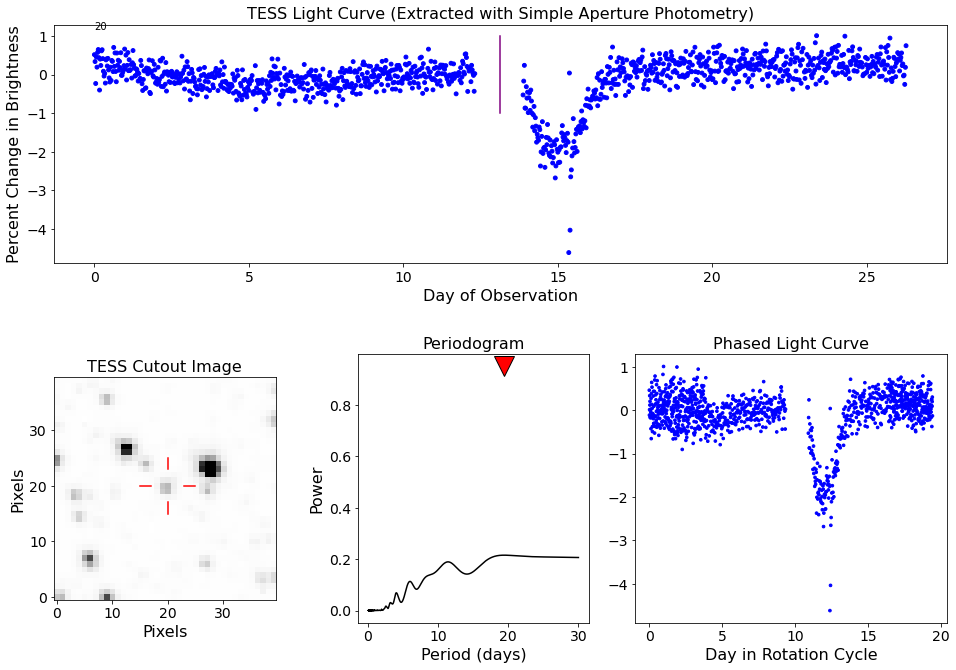

In [ ]:

#@widgets.interact_manual(sector_select=sector_widget, lc_select=lc_widget, sap_line = sap_widget, yra=yra_widget, pmin=pmin_widget, pmax=pmax_widget, xlog=xlog_widget, multi=multi_widget, double=double_widget, notes=notes_widget, button=button_widget)
#def plot(sector_select=sector_widget, lc_select=lc_widget, sap_line = sap_widget, yra=yra_widget, pmin=pmin_widget, pmax=pmax_widget, xlog=xlog_widget,multi=multi_widget, double=double_widget, notes=notes_widget, button=button_widget):

@widgets.interact_manual(lc_select=lc_widget, sector_selection = sector_widget, sap_line = sap_widget, xra=xra_widget, yra=yra_widget, pmin=pmin_widget, pmax=pmax_widget, xlog=xlog_widget, multi=multi_widget, flares=flare_widget, double=double_widget,  notes=notes_widget, button=button_widget)
def plot(lc_select=lc_widget, sector_selection = sector_widget, sap_line = sap_widget, xra=xra_widget, yra=yra_widget, pmin=pmin_widget, pmax=pmax_widget, xlog=xlog_widget,multi=multi_widget, flares=flare_widget, double=double_widget, notes=notes_widget, button=button_widget):
# how many observations?
    n_obs = len(star_list)
    print(n_obs)
    print('On star #'+str(do_now['i'])+' of '+str(n_obs))
# Some setup
    global tstar #, times, flux
# Load the observation
    if (do_now['i']<n_obs):
        lead = 'Next star: '
        if do_now['i'] ==0:
            lead = 'First star: '
        print(lead+star_list[do_now['i']],'  Status= ',do_now['status'])
        if len(tstar['Source']) == 0:
            do_now['start_time'] = time.time()
            star = tesscheck.make_star(target_data, star_list[do_now['i']])
            tstar = tesscheck.initiate_star(star,project_name,user=user)
    print('Gmag is '+str(tstar['Gmag'])+' and SpT estimate is '+meancolor(float(tstar['gbr'])))
    tstar['which_sectors'] = tstar['sector_list']


# add in save now?
    save_now = True
    if do_now['status'] == 'first':
#        time_1 = time.time()
        tstar = tesscheck.display_tess_lite_v2(tstar, save = False, noplot = False)
           #mark trying to make sector selector widget do just what we want
        sector_widget.options = tstar['sector_list']
        sector_widget.value = tstar['sector_list'] 
        


#        print('Calculation 1: '+str(time.time()-time_1))
    print('Sectors available: '+str(tstar['sector_list']))
    if len(tstar['which_sectors']) > len(tstar['sector_list']):
      sectors_to_use = []
      for i_include_sector in range(len(tstar['sector_list'])):
          id_include_sector = np.where(tstar['sector_list'][i_include_sector] == np.array(tstar['which_sectors']))
          if len(id_include_sector[0]) == 1:
            sectors_to_use.append(tstar['sector_list'][i_include_sector])
          tstar['which_sectors'] = sectors_to_use
      
    print('Sectors displayed: '+str(tstar['which_sectors']))
    #print('Prot='+str(tstar['Prot_LS'])[0:7])

# Update settings based on widget changes
    # Sector(s) to analyze
#    sector_select = 'All'
    tstar['which_sectors'] = sector_selection

    # Which light curve to analyze
    tstar['which_LC'] = lc_select

    # Which light curve to analyze
    tstar['SAP_line'] = sap_line

    # Lomb-Scargle settings
    tstar['pmin'] = float(pmin)
    tstar['pmax'] = float(pmax)
    if xlog == True:
      tstar['pxlog'] = 1
    else:
      tstar['pxlog'] = 0

    # Y-range for light curve plots
    if float(yra)>0:
      tstar['y_min'] = -float(yra)
      tstar['y_max'] = float(yra)

    # Y-range for light curve plots
    if xra != '0':
      xra_arr = xra.split(',') 
      tstar['x_min'] = float(xra_arr[0])
      tstar['x_max'] = float(xra_arr[1])

    # Analyze: are there multiple periods?
    if multi == True:
      tstar['Multi'] = 1
    else:
      tstar['Multi'] = 0

    # Insepct if there are signs of flaring?
    if flares == True:
      tstar['Flares'] = 1
    else:
      tstar['Flares'] = 0

    # Did the Lomb-Scargle peiodogram find the half-period harmonic?
    if double == True:
      tstar['is_it_double'] = 1
    else:
      tstar['is_it_double'] = 0

    # Add a note?
    if len(notes)>0:
      tstar['Notes'] = notes

# Actions:

    # Accept the Prot as validated
    if button == 'Publish':
      print('accept')
      tstar['LC_Quality'] = 1

    if button == 'Good':
      print('accept')
      tstar['LC_Quality'] = 1

    # The Prot is unclear
    if button == 'Follow up':
      print('requires follow up')      
      tstar['LC_Quality'] = 1
      tstar['Prot_final'] = -1

    # There is no periodicity and/or the light curve is flat
    if button == 'Flat':
      print('flat')      
      tstar['LC_Quality'] = 0
      tstar['Prot_final'] = -1

    # The light curve is garbage, or suffers from strong systematics
    if button == 'Garbage':
      print('garbage')      
      tstar['LC_Quality'] = -1
      tstar['Prot_final'] = -1

    # Save the action
    tstar['LC_Action'] = button
    #do_now['status'] = button

    
    if (tstar['LC_Action'] == 'Under Review') & (do_now['status'] != 'first'): 
      tstar = tesscheck.display_tess_lite_v2(tstar, save = False, noplot = False)
      print('Prot='+str(tstar['Prot_LS'])[0:7])
    if do_now['status'] == 'first':
      do_now['status'] = 'in progress'

# Reset widgets, iterate, clear tstar
    if button != 'Under Review':
        tstar = tesscheck.display_tess_lite_v2(tstar, save = True, noplot = False)
        print('Prot='+str(tstar['Prot_LS'])[0:7])
        # update the table
        tesscheck.update_prot_table(prot_table, tstar)
        # modify panel filename        
        tesscheck.update_panelname(tstar)                

        # iterate the index to the next star
        do_now['i'] += 1
        # Reset the widgets
#        sector_widget.value = 'All'
        lc_widget.value = 'CPM'
        sap_widget.value = False
        xra_widget.value = '0'
        yra_widget.value = '0.0'
        pmin_widget.value = '0.09'
        pmax_widget.value = '30.0'
        multi_widget.value = False
        flare_widget.value = False
        double_widget.value = False
        xlog_widget.value = False
        notes_widget.value = ''
        button_widget.value = 'Under Review'
        #removing so doesn't rely on cycle_sectors
        #sector_widget.options = cycle_sectors
        #sector_widget.value = cycle_sectors
        # Reset the tstar object
        tstar = tesscheck.initiate_star(0,project_name,user=user,blank=True)
        do_now['status'] = 'first'
        elapsed_time = time.time() - do_now['start_time']
#        print('Task completed in '+str(elapsed_time)+' sec')
        print('Next star ready. Click "Run Interact" to continue."')
        #star = make_star(target_data, star_list[do_now['i']])
        #tstar = initiate_star(star,'NGC_7092',user=user)
        save_now = False
        #tstar = display_tess_lite_v2(tstar, save = save_now, noplot = False)
        #print('...Next star:')
        #print(star_list[do_now['i']])

# we are done.
    if do_now['i'] == n_obs:
        print('')
        print('')
        print('ALL DONE')


# extra buttons
#   Prot=B - might be the right period, but lower confidence
#   Prot Fail - not necessarily flat, but failed for some reason.

In [ ]:
def beat_check (period1,period2):
  freq1 = 1.0/period1
  freq2 = 1.0/period2
  beat_freq = np.abs(freq2-freq1)
  return (1/beat_freq)

In [ ]:
beat_check(0.200,0.400)

0.4

Number of rotators: 43


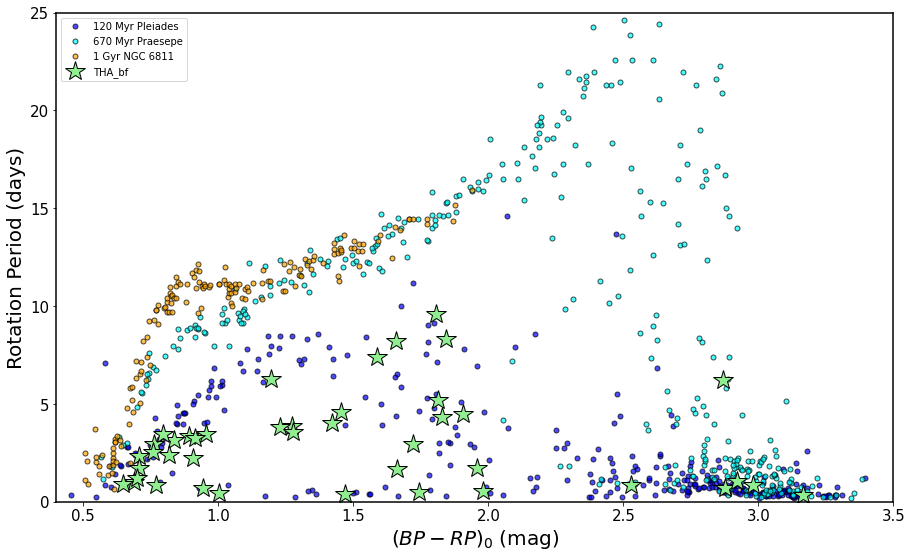

In [ ]:
def prot_show(project_name, user, gbr, clusters=False, pcut=0.0, av=0.0):
#    gbr = target_data['BP_RP'].to_numpy(dtype=float)
    fig1, ax1 = plt.subplots(figsize=(15,9)) 
    ax1.tick_params(axis='both', which='major', labelsize=15)
    aw = 1.5
    ax1.spines['top'].set_linewidth(aw)
    ax1.spines['left'].set_linewidth(aw)
    ax1.spines['right'].set_linewidth(aw)
    ax1.spines['bottom'].set_linewidth(aw)

    prot_table_now = tesscheck.get_prot_table(user,project_name)
    prot_data_val_now = prot_table_now.get_all_values()
    prot_data_now = pd.DataFrame.from_records(prot_data_val_now[1:],columns=prot_data_val_now[0])
    
    pnow = prot_data_now['Prot_Final'].to_numpy()
    qnow = prot_data_now['Quality'].to_numpy()
    uu = np.where((pnow != '') & (pnow != '-1') & (gbr != 'nan') & (qnow != '-1'))
#    uu = np.where((pnow != '') & (pnow != '-1') & (gbr != 'nan'))
    prot_now = np.array(pnow[uu[0]],dtype=float)
    color = gbr[uu[0]].astype(float) - 0.415*av
    power_now = prot_data_now['Power_LS'].to_numpy()
    
    vv = np.where((power_now[uu[0]].astype(float)>pcut) & (prot_now > 0) & (prot_now < 99))
    ax1.set_xlim(0.4,3.5)
    ax1.set_xlabel('$(BP - RP)_0$ (mag)',fontsize=20)
    ax1.set_ylim(0,25)
    ax1.set_ylabel('Rotation Period (days)',fontsize=20)

    
    if clusters == True:
        file = glob(dir_main+'tess_check/Curtis2020-ClustersTable.txt')
        clus = Table.read(file[0], format="ascii.cds")
        indices_Pleiades = np.where((clus["Cluster"] ==  "Pleiades"))
        indices_Praesepe = np.where((clus["Cluster"] == "Praesepe"))
        indices_NGC6811 = np.where((clus["Cluster"] == "NGC 6811"))
#        pleiades = clus.iloc[indicesPl]
#        praesepe = clus.iloc[indicesPr]
#        NGC6811 = clus.iloc[indicesNGC]
        ax1.plot(clus["(BP-RP)0"][indices_Pleiades[0]], clus["Prot"][indices_Pleiades[0]], markerfacecolor = 'blue', markeredgecolor='black', label = '120 Myr Pleiades',markersize=10,alpha=0.7,linestyle='',marker='.')
        ax1.plot(clus["(BP-RP)0"][indices_Praesepe[0]], clus["Prot"][indices_Praesepe[0]], markerfacecolor = 'cyan', markeredgecolor='black', label = '670 Myr Praesepe',markersize=10,alpha=0.7,linestyle='',marker='.')
        ax1.plot(clus["(BP-RP)0"][indices_NGC6811[0]], clus["Prot"][indices_NGC6811[0]], markerfacecolor = 'orange', markeredgecolor='black', label = '1 Gyr NGC 6811',markersize=10,alpha=0.7,linestyle='',marker='.')

    ax1.plot(color[vv[0]], prot_now[vv[0]],markerfacecolor='lightgreen',markeredgecolor='black',marker='*',markersize=20,linestyle='',label=project_name)
#    ax1.scatter(1.758118-0.415*av,13.2,c='red',s=200)
    plt.legend(loc='upper left')
    print("Number of rotators: "+str(len(vv[0])))
#    ax1.plot([1.2375,1.2375],[0,20],c='green')
#    ax1.plot([0.5,2.5],[11.677,11.677],c='green')
    plt.show()

prot_show(project_name, user, gbr, clusters=True, pcut=0.0, av=0.0)

In [ ]:
1/(1/.265)+(1/.303)

3.5653300330033004

In [ ]:
1) get a list of stars with 'Prot_LS' == 0
  we just import the whole target_table, check for prot == 0, then output the list of stars 
2) we use check_cpm on that list of stars
  if 

In [ ]:
star = tesscheck.make_star(target_data, '2983526215016630912')

In [ ]:
tstar= tesscheck.initiate_star(star, project_name, user=user)

In [ ]:
from astropy.coordinates import SkyCoord, Angle
import astropy.units as u
!pip install astroquery
from astroquery.vizier import Vizier
from astropy.time import Time
from astropy.io import fits

     |████████████████████████████████| 3.9MB 21.6MB/s 
     |████████████████████████████████| 808kB 31.7MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 3.2MB 29.6MB/s 
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=4f234950a63f774cd500a983864b89caf8d14c9b4d50825b90177db80e8f0c3a
  Stored in directory: /root/.cache/pip/wheels/54/ca/c7/3db47cc5c748286db22a7fab43ccf985903d2b9ca119de16ab
Successfully built mimeparse


In [ ]:
    """Make the Gaia Figure Elements"""
# Get the positions of the Gaia sources
c1 = SkyCoord(tstar['RA'], tstar['Dec'], frame="icrs", unit="deg")
# Use pixel scale for query size
pix_scale = 21.0  # arcseconds / pixel for TESS, default
magnitude_limit = 19.0

In [ ]:
ffi_image = tesscheck.load_ffi_fromfile(tstar['file_ffi'][0])
tesscheck.ffi_test(ffi_image)

1

In [ ]:
#we want the header for the wcs coordinate system I think
ffi_data = fits.open(tstar['file_ffi'][0])

Text(0, 0.5, 'Pixels')

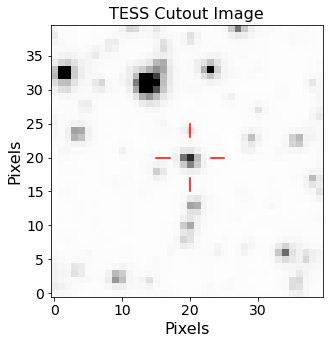

In [ ]:
panel = plt.figure(figsize=(5,5))
ffimage = panel.add_subplot()
ffimage.set_title('TESS Cutout Image')
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()
ffi_mod = np.clip(ffi_image-np.min(ffi_image),0,1000)
ffimage.imshow(ffi_mod,origin = 'lower',cmap=reversed_color_map)
ffimage.plot([15,17],[20,20],color='red')    
ffimage.plot([23,25],[20,20],color='red')    
ffimage.plot([20,20],[15,17],color='red')    
ffimage.plot([20,20],[23,25],color='red')    
ffimage.set_xlabel('Pixels')
ffimage.set_ylabel('Pixels')

In [ ]:

Vizier.ROW_LIMIT = -1
result = Vizier.query_region(
    c1,
    catalog=["I/345/gaia2"],
    radius=Angle(19 * pix_scale, "arcsec"), #changed to 15 just to make it fit
)
no_targets_found_message = ValueError(
    "Either no sources were found in the query region " "or Vizier is unavailable"
)
too_few_found_message = ValueError(
    "No sources found brighter than {:0.1f}".format(magnitude_limit)
)
if result is None:
    raise no_targets_found_message
elif len(result) == 0:
    raise too_few_found_message
result = result["I/345/gaia2"].to_pandas()
result = result[result.Gmag < magnitude_limit]
if len(result) == 0:
    raise no_targets_found_message

#This corrects for proper motion. Requires the time of the image. Going to see if we can avoid for now 
'''
ra_corrected, dec_corrected, _ = _correct_with_proper_motion(
        np.nan_to_num(np.asarray(result.RA_ICRS)) * u.deg, np.nan_to_num(np.asarray(result.DE_ICRS)) * u.deg,
        np.nan_to_num(np.asarray(result.pmRA)) * u.milliarcsecond / u.year,
        np.nan_to_num(np.asarray(result.pmDE)) * u.milliarcsecond / u.year,
        Time(2457206.375, format="jd", scale="tdb"),
        tpf.time[0])
result.RA_ICRS = ra_corrected.to(u.deg).value
result.DE_ICRS = dec_corrected.to(u.deg).value''' 

'\nra_corrected, dec_corrected, _ = _correct_with_proper_motion(\n        np.nan_to_num(np.asarray(result.RA_ICRS)) * u.deg, np.nan_to_num(np.asarray(result.DE_ICRS)) * u.deg,\n        np.nan_to_num(np.asarray(result.pmRA)) * u.milliarcsecond / u.year,\n        np.nan_to_num(np.asarray(result.pmDE)) * u.milliarcsecond / u.year,\n        Time(2457206.375, format="jd", scale="tdb"),\n        tpf.time[0])\nresult.RA_ICRS = ra_corrected.to(u.deg).value\nresult.DE_ICRS = dec_corrected.to(u.deg).value'

In [ ]:
def _correct_with_proper_motion(ra, dec, pm_ra, pm_dec, equinox, new_time):
    """Return proper-motion corrected RA / Dec.
       It also return whether proper motion correction is applied or not."""
    # all parameters have units

    if ra is None or dec is None or \
       pm_ra is None or pm_dec is None or (np.all(pm_ra == 0) and np.all(pm_dec == 0)) or \
       equinox is None:
        return ra, dec, False

    # To be more accurate, we should have supplied distance to SkyCoord
    # in theory, for Gaia DR2 data, we can infer the distance from the parallax provided.
    # It is not done for 2 reasons:
    # 1. Gaia DR2 data has negative parallax values occasionally. Correctly handling them could be tricky. See:
    #    https://www.cosmos.esa.int/documents/29201/1773953/Gaia+DR2+primer+version+1.3.pdf/a4459741-6732-7a98-1406-a1bea243df79
    # 2. For our purpose (ploting in various interact usage) here, the added distance does not making
    #    noticeable significant difference. E.g., applying it to Proxima Cen, a target with large parallax
    #    and huge proper motion, does not change the result in any noticeable way.
    #
    c = SkyCoord(ra, dec, pm_ra_cosdec=pm_ra, pm_dec=pm_dec,
                frame='icrs', obstime=equinox)

    # Suppress ErfaWarning temporarily as a workaround for:
    #   https://github.com/astropy/astropy/issues/11747
    with warnings.catch_warnings():
        # the same warning appears both as an ErfaWarning and a astropy warning
        # so we filter by the message instead
        warnings.filterwarnings("ignore", message="ERFA function")
        new_c = c.apply_space_motion(new_obstime=new_time)
    return new_c.ra, new_c.dec, True


In [ ]:
ffi_image.shape[1:]

(40,)

In [ ]:
from astropy import wcs

In [ ]:
radecs = np.vstack([result["RA_ICRS"], result["DE_ICRS"]]).T


In [ ]:
w = wcs.WCS(ffi_data[2].header)

In [ ]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 78.619025704987  -15.246649046338  
CRPIX : 20.504537461019  20.510333281798  
PC1_1 PC1_2  : -0.0057621097363279  0.00090300113269916  
PC2_1 PC2_2  : -0.00085320515760606  -0.0057541424515926  
CDELT : 1.0  1.0  
NAXIS : 40  40

In [ ]:
print(sky)

NameError: ignored

In [ ]:
coords = w.all_world2pix(radecs, 0)

In [ ]:
sizes = 6400.0 / (16 ** (result["Gmag"] / 8.0))

Text(0, 0.5, 'Pixels')

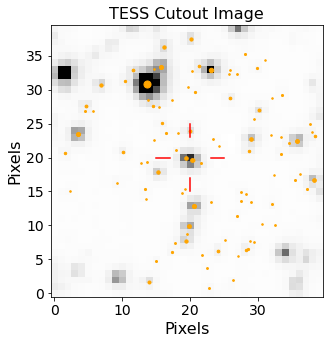

In [ ]:

panel = plt.figure(figsize=(5,5))
ffimage = panel.add_subplot()
ffimage.set_title('TESS Cutout Image')
color_map = plt.cm.get_cmap('gray')
reversed_color_map = color_map.reversed()
ffi_mod = np.clip(ffi_image-np.min(ffi_image),0,1000)
ffimage.imshow(ffi_mod,origin = 'lower',cmap=reversed_color_map)
ffimage.plot([15,17],[20,20],color='red')    
ffimage.plot([23,25],[20,20],color='red')    
ffimage.plot([20,20],[15,17],color='red')    
ffimage.plot([20,20],[23,25],color='red')    
for row,size in zip(coords,sizes.values):
  ffimage.scatter((row[0]),row[1],marker='.',s=size,color='orange')
ffimage.set_xlabel('Pixels')
ffimage.set_ylabel('Pixels')

In [ ]:
sizes

0        9.616795
2        9.317909
4       14.710315
5        8.901548
6       12.510835
8       54.348043
11      66.627977
12      13.445078
18     166.065225
20      12.371566
23      18.121195
24      17.483307
25     204.301529
26      15.867536
27      10.540024
28      10.538197
29       8.862454
30      33.145846
31      15.588457
35      11.240671
37       9.358687
43      10.306311
46      40.888017
47      16.406620
51      24.394030
53      34.755182
54      27.929274
55      12.966401
59      15.192171
60      47.384923
61      94.645118
63      54.359346
66      12.762652
67      11.368785
73      10.428113
75      39.511650
77      31.073357
79       9.969051
83      31.679029
84      15.389305
85      15.476488
88      48.996480
89      11.278523
90      10.940875
91      20.074000
92      18.983264
95      11.508327
99      14.234365
101     14.090552
Name: Gmag, dtype: float64

In [ ]:
from astroquery.mast import Observations, Catalogs

In [ ]:
gaia_ids = np.array(['2983526215016630912'])
# Query the TIC first
result = Catalogs.query_criteria(catalog="Tic", GAIA=gaia_ids)

In [ ]:
result

ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,TWOMflag,prox,w1mag,e_w1mag,w2mag,e_w2mag,w3mag,e_w3mag,w4mag,e_w4mag,GAIAmag,e_GAIAmag,Tmag,e_Tmag,TESSflag,SPFlag,Teff,e_Teff,logg,e_logg,MH,e_MH,rad,e_rad,mass,e_mass,rho,e_rho,lumclass,lum,e_lum,d,e_d,ebv,e_ebv,numcont,contratio,disposition,duplicate_id,priority,eneg_EBV,epos_EBV,EBVflag,eneg_Mass,epos_Mass,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID
str9,str8,int64,str1,str10,str16,str1,str19,str19,str7,int64,str4,str7,float64,float64,str7,float64,float64,float64,float64,str5,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,int64,float64,str1,str1,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,str6,float64,float64,float64,float64,int64,str1,str5,str8,str1,float64,float64,float64,float64,float64,float64,int64,int64,str9
188969241,20190415,--,--,374-007463,05142736-1514514,--,J051427.36-151451.7,2983526215016630912,7603879,--,STAR,tmgaia2,78.6141057725156,-15.2476497270203,tmgaia2,34.5519,0.0604612,-15.1755,0.0703381,gaia2,13.145,0.0414375,gaia2,216.405882710298,-28.1982634887525,75.9864837860904,-38.1346662983749,16.303,0.06,14.732,0.025,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,10.711,0.039,10.176,0.045,9.792,0.03,EEE-222-111-000-0-0,nan,9.48,0.023,9.319,0.02,9.207,0.031,9.022,0.536,13.6748,0.002186,12.5497,0.0068,gbprp,gaia2,3401.0,87.7551,4.54739,0.168174,nan,nan,0.557661,0.0628493,0.4,0.0858588,2.30648,1.22652,DWARF,0.0374853835,0.005838265,75.9086,0.24055,0.0,0.0,72,0.6848244,--,--,0.00100176409,0.0,0.0,--,0.0590846,0.112633,0.0647332,0.0609653,0.934479,1.51856,0.182199,0.154148,0.00491398,0.00676255,0.2398,0.2413,bj2018,68.5332,106.977,dered0,15.1478,0.014756,12.4744,0.00566,1,--,cdwrf,apassdr9,--,0.945946388332495,1.09070954222213,78.6142599655268,-15.2477150660318,0.0288443084988038,0.0319820047855725,1,0,536680081
